In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import warnings
from scipy.interpolate import UnivariateSpline

%matplotlib inline

/Users/danstechman/anaconda/lib/python3.5/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [100]:
figSavePath = '/Users/danstechman/GoogleDrive/School/Research/PECAN/Microphysics/plots/'
fType = 'png'

plotRHall    = True
plotNtAll    = True
plotTWCall   = True
plotDmmAll   = True
plotARall    = True
plotREall    = True
plotRjctRall = True

# Define temp bin interval
binIntvl = 1.0


# tzSprdCol = '#92c83e'
# srSprdCol = '#cb000f'
# arSprdCol = '#41489e'
# tzMcol = '#92c83e'
# srMcol = '#cb000f'
# arMcol = '#41489e'
tzSprdCol = 'darkkhaki'
srSprdCol = 'mediumslateblue'
arSprdCol = 'darkcyan'
tzMcol = 'darkkhaki'
srMcol = 'mediumslateblue'
arMcol = 'darkcyan'

In [3]:
flights = ['20150617','20150620','20150701','20150702','20150706','20150709']


# Initialize dictionaries to hold each concatenated variable within each of the 3 regions
tz = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
sr = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
ar = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}

for flight in flights:
    cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'

    # Pull out any global variables/attributes from the netcdf file
    cipData_root = xr.open_dataset(cipFile)
    sprlZone = str(cipData_root.sprlZone.data,'utf-8')
    numSprls = len(sprlZone)

    # Loop over each spiral for the current flight
    for ix in np.arange(0,numSprls):
        # Open the group associated with the current spiral
        cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

        if sprlZone[ix] == 'T':
            tz['tempC'].append(cipData.tempC_10s.data.tolist())
            tz['rh'].append(cipData.rh_10s.data.tolist())
            tz['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            tz['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            tz['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            tz['ar'].append(cipData.areaRatio_10s.data.tolist())
            tz['re'].append(cipData.efctvRadius_10s.data.tolist())
            tz['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
        
        if sprlZone[ix] == 'S':
            sr['tempC'].append(cipData.tempC_10s.data.tolist())
            sr['rh'].append(cipData.rh_10s.data.tolist())
            sr['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            sr['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            sr['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            sr['ar'].append(cipData.areaRatio_10s.data.tolist())
            sr['re'].append(cipData.efctvRadius_10s.data.tolist())
            sr['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
        
        if sprlZone[ix] == 'A':
            ar['tempC'].append(cipData.tempC_10s.data.tolist())
            ar['rh'].append(cipData.rh_10s.data.tolist())
            ar['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            ar['twc'].append(cipData.cipTWC_hybrid_igf.data.tolist())
            ar['Dmm'].append(cipData.cipDmm_hybrid_igf.data.tolist())
            ar['ar'].append(cipData.areaRatio_10s.data.tolist())
            ar['re'].append(cipData.efctvRadius_10s.data.tolist())
            ar['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())

# Pull out all the data for each variable and place within a single
#    list (the steps above produce nested lists for some reason...)
tz['tempC'] = [i for sublist in tz['tempC'] for i in sublist]
tz['rh'] = [i for sublist in tz['rh'] for i in sublist]
tz['Nt'] = [i for sublist in tz['Nt'] for i in sublist]
tz['twc'] = [i for sublist in tz['twc'] for i in sublist]
tz['Dmm'] = [i for sublist in tz['Dmm'] for i in sublist]
tz['ar'] = [i for sublist in tz['ar'] for i in sublist]
tz['re'] = [i for sublist in tz['re'] for i in sublist]
tz['rjctRatio'] = [i for sublist in tz['rjctRatio'] for i in sublist]

sr['tempC'] = [i for sublist in sr['tempC'] for i in sublist]
sr['rh'] = [i for sublist in sr['rh'] for i in sublist]
sr['Nt'] = [i for sublist in sr['Nt'] for i in sublist]
sr['twc'] = [i for sublist in sr['twc'] for i in sublist]
sr['Dmm'] = [i for sublist in sr['Dmm'] for i in sublist]
sr['ar'] = [i for sublist in sr['ar'] for i in sublist]
sr['re'] = [i for sublist in sr['re'] for i in sublist]
sr['rjctRatio'] = [i for sublist in sr['rjctRatio'] for i in sublist]

ar['tempC'] = [i for sublist in ar['tempC'] for i in sublist]
ar['rh'] = [i for sublist in ar['rh'] for i in sublist]
ar['Nt'] = [i for sublist in ar['Nt'] for i in sublist]
ar['twc'] = [i for sublist in ar['twc'] for i in sublist]
ar['Dmm'] = [i for sublist in ar['Dmm'] for i in sublist]
ar['ar'] = [i for sublist in ar['ar'] for i in sublist]
ar['re'] = [i for sublist in ar['re'] for i in sublist]
ar['rjctRatio'] = [i for sublist in ar['rjctRatio'] for i in sublist]

# Convert the lists in each dictionary to numpy arrays
tz = {key: np.array(val) for key, val in tz.items()}
sr = {key: np.array(val) for key, val in sr.items()}
ar = {key: np.array(val) for key, val in ar.items()}

In [4]:
# Define temperature bin edges and determine bin midpoints
edgeMin = -19.0 - (binIntvl/2.)
edgeMax = 20.5 + (binIntvl/2.)
# edgesTemp = np.arange(-19.25,20.75,0.5)
edgesTemp = np.arange(edgeMin,edgeMax,binIntvl)
bin_mid = (edgesTemp[0:-1] + edgesTemp[1:])/2
numBins = len(edgesTemp)-1

# Determine which bins each of the temperatures correspond to within each MCS region
whichBinTemp_TZ = np.digitize(tz['tempC'],edgesTemp)
whichBinTemp_SR = np.digitize(sr['tempC'],edgesTemp)
whichBinTemp_AR = np.digitize(ar['tempC'],edgesTemp)


# Define arrays filled with NaNs to hold the min/max/mean/quantiles
#    for each variable and at each temperature bin
binRH_min_TZ, binRH_max_TZ, binRH_mean_TZ, binRH_median_TZ, binRH_10pct_TZ, binRH_90pct_TZ, \
binNt_min_TZ, binNt_max_TZ, binNt_mean_TZ, binNt_median_TZ, binNt_10pct_TZ, binNt_90pct_TZ, \
binTWC_min_TZ, binTWC_max_TZ, binTWC_mean_TZ, binTWC_median_TZ, binTWC_10pct_TZ, binTWC_90pct_TZ, \
binDmm_min_TZ, binDmm_max_TZ, binDmm_mean_TZ, binDmm_median_TZ, binDmm_10pct_TZ, binDmm_90pct_TZ, \
binAR_min_TZ, binAR_max_TZ, binAR_mean_TZ, binAR_median_TZ, binAR_10pct_TZ, binAR_90pct_TZ, \
binRE_min_TZ, binRE_max_TZ, binRE_mean_TZ, binRE_median_TZ, binRE_10pct_TZ, binRE_90pct_TZ, \
binRjcR_min_TZ, binRjcR_max_TZ, binRjcR_mean_TZ, binRjcR_median_TZ, binRjcR_10pct_TZ, binRjcR_90pct_TZ, \
    = [np.full(numBins,np.nan) for i in range(42)]

binRH_min_SR, binRH_max_SR, binRH_mean_SR, binRH_median_SR, binRH_10pct_SR, binRH_90pct_SR, \
binNt_min_SR, binNt_max_SR, binNt_mean_SR, binNt_median_SR, binNt_10pct_SR, binNt_90pct_SR, \
binTWC_min_SR, binTWC_max_SR, binTWC_mean_SR, binTWC_median_SR, binTWC_10pct_SR, binTWC_90pct_SR, \
binDmm_min_SR, binDmm_max_SR, binDmm_mean_SR, binDmm_median_SR, binDmm_10pct_SR, binDmm_90pct_SR, \
binAR_min_SR, binAR_max_SR, binAR_mean_SR, binAR_median_SR, binAR_10pct_SR, binAR_90pct_SR, \
binRE_min_SR, binRE_max_SR, binRE_mean_SR, binRE_median_SR, binRE_10pct_SR, binRE_90pct_SR, \
binRjcR_min_SR, binRjcR_max_SR, binRjcR_mean_SR, binRjcR_median_SR, binRjcR_10pct_SR, binRjcR_90pct_SR, \
    = [np.full(numBins,np.nan) for i in range(42)]

binRH_min_AR, binRH_max_AR, binRH_mean_AR, binRH_median_AR, binRH_10pct_AR, binRH_90pct_AR, \
binNt_min_AR, binNt_max_AR, binNt_mean_AR, binNt_median_AR, binNt_10pct_AR, binNt_90pct_AR, \
binTWC_min_AR, binTWC_max_AR, binTWC_mean_AR, binTWC_median_AR, binTWC_10pct_AR, binTWC_90pct_AR, \
binDmm_min_AR, binDmm_max_AR, binDmm_mean_AR, binDmm_median_AR, binDmm_10pct_AR, binDmm_90pct_AR, \
binAR_min_AR, binAR_max_AR, binAR_mean_AR, binAR_median_AR, binAR_10pct_AR, binAR_90pct_AR, \
binRE_min_AR, binRE_max_AR, binRE_mean_AR, binRE_median_AR, binRE_10pct_AR, binRE_90pct_AR, \
binRjcR_min_AR, binRjcR_max_AR, binRjcR_mean_AR, binRjcR_median_AR, binRjcR_10pct_AR, binRjcR_90pct_AR, \
    = [np.full(numBins,np.nan) for i in range(42)]

In [5]:
# Loop through the temperature bins and determine the indices of the
#    temperature variable corresponding to temps within said bin
#    Then, use these indices to refer to the appropriate values in each of
#    our variables of interest.
with warnings.catch_warnings():
    # Many of our variables have temp bins with all NaNs which will 
    #    throw runtime warnings everytime we try to use nan*math functions
    #    Here we just tell python to ignore these specific warnings to unclutter
    #    the output
    warnings.filterwarnings('ignore', 'All-NaN (slice|axis) encountered')
    warnings.filterwarnings('ignore', 'Mean of empty slice')
    for ix in range(0,numBins):
        binMatch_TZ = np.squeeze(np.where(whichBinTemp_TZ == ix))
        binMatch_SR = np.squeeze(np.where(whichBinTemp_SR == ix))
        binMatch_AR = np.squeeze(np.where(whichBinTemp_AR == ix))
        binRH_TZ = tz['rh'][binMatch_TZ]
        binRH_SR = sr['rh'][binMatch_SR]
        binRH_AR = ar['rh'][binMatch_AR]
        binNt_TZ = tz['Nt'][binMatch_TZ]
        binNt_SR = sr['Nt'][binMatch_SR]
        binNt_AR = ar['Nt'][binMatch_AR]
        binTWC_TZ = tz['twc'][binMatch_TZ]
        binTWC_SR = sr['twc'][binMatch_SR]
        binTWC_AR = ar['twc'][binMatch_AR]
        binDmm_TZ = tz['Dmm'][binMatch_TZ]
        binDmm_SR = sr['Dmm'][binMatch_SR]
        binDmm_AR = ar['Dmm'][binMatch_AR]
        binAR_TZ = tz['ar'][binMatch_TZ]
        binAR_SR = sr['ar'][binMatch_SR]
        binAR_AR = ar['ar'][binMatch_AR]
        binRE_TZ = tz['re'][binMatch_TZ]
        binRE_SR = sr['re'][binMatch_SR]
        binRE_AR = ar['re'][binMatch_AR]
        binRjcR_TZ = tz['rjctRatio'][binMatch_TZ]
        binRjcR_SR = sr['rjctRatio'][binMatch_SR]
        binRjcR_AR = ar['rjctRatio'][binMatch_AR]


        if np.any(binMatch_TZ):
            binRH_min_TZ[ix] = np.nanmin(binRH_TZ)
            binRH_max_TZ[ix] = np.nanmax(binRH_TZ)
            binRH_mean_TZ[ix] = np.nanmean(binRH_TZ)
            binRH_median_TZ[ix] = np.nanmedian(binRH_TZ)
            binRH_10pct_TZ[ix] = np.nanpercentile(binRH_TZ,10)
            binRH_90pct_TZ[ix] = np.nanpercentile(binRH_TZ,90)

            binNt_min_TZ[ix] = np.nanmin(binNt_TZ)
            binNt_max_TZ[ix] = np.nanmax(binNt_TZ)
            binNt_mean_TZ[ix] = np.nanmean(binNt_TZ)
            binNt_median_TZ[ix] = np.nanmedian(binNt_TZ)
            binNt_10pct_TZ[ix] = np.nanpercentile(binNt_TZ,10)
            binNt_90pct_TZ[ix] = np.nanpercentile(binNt_TZ,90)

            binTWC_min_TZ[ix] = np.nanmin(binTWC_TZ)
            binTWC_max_TZ[ix] = np.nanmax(binTWC_TZ)
            binTWC_mean_TZ[ix] = np.nanmean(binTWC_TZ)
            binTWC_median_TZ[ix] = np.nanmedian(binTWC_TZ)
            binTWC_10pct_TZ[ix] = np.nanpercentile(binTWC_TZ,10)
            binTWC_90pct_TZ[ix] = np.nanpercentile(binTWC_TZ,90)

            binDmm_min_TZ[ix] = np.nanmin(binDmm_TZ)
            binDmm_max_TZ[ix] = np.nanmax(binDmm_TZ)
            binDmm_mean_TZ[ix] = np.nanmean(binDmm_TZ)
            binDmm_median_TZ[ix] = np.nanmedian(binDmm_TZ)
            binDmm_10pct_TZ[ix] = np.nanpercentile(binDmm_TZ,10)
            binDmm_90pct_TZ[ix] = np.nanpercentile(binDmm_TZ,90)

            binAR_min_TZ[ix] = np.nanmin(binAR_TZ)
            binAR_max_TZ[ix] = np.nanmax(binAR_TZ)
            binAR_mean_TZ[ix] = np.nanmean(binAR_TZ)
            binAR_median_TZ[ix] = np.nanmedian(binAR_TZ)
            binAR_10pct_TZ[ix] = np.nanpercentile(binAR_TZ,10)
            binAR_90pct_TZ[ix] = np.nanpercentile(binAR_TZ,90)

            binRE_min_TZ[ix] = np.nanmin(binRE_TZ)
            binRE_max_TZ[ix] = np.nanmax(binRE_TZ)
            binRE_mean_TZ[ix] = np.nanmean(binRE_TZ)
            binRE_median_TZ[ix] = np.nanmedian(binRE_TZ)
            binRE_10pct_TZ[ix] = np.nanpercentile(binRE_TZ,10)
            binRE_90pct_TZ[ix] = np.nanpercentile(binRE_TZ,90)

            binRjcR_min_TZ[ix] = np.nanmin(binRjcR_TZ)
            binRjcR_max_TZ[ix] = np.nanmax(binRjcR_TZ)
            binRjcR_mean_TZ[ix] = np.nanmean(binRjcR_TZ)
            binRjcR_median_TZ[ix] = np.nanmedian(binRjcR_TZ)
            binRjcR_10pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,10)
            binRjcR_90pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,90)


        if np.any(binMatch_SR):
            binRH_min_SR[ix] = np.nanmin(binRH_SR)
            binRH_max_SR[ix] = np.nanmax(binRH_SR)
            binRH_mean_SR[ix] = np.nanmean(binRH_SR)
            binRH_median_SR[ix] = np.nanmedian(binRH_SR)
            binRH_10pct_SR[ix] = np.nanpercentile(binRH_SR,10)
            binRH_90pct_SR[ix] = np.nanpercentile(binRH_SR,90)

            binNt_min_SR[ix] = np.nanmin(binNt_SR)
            binNt_max_SR[ix] = np.nanmax(binNt_SR)
            binNt_mean_SR[ix] = np.nanmean(binNt_SR)
            binNt_median_SR[ix] = np.nanmedian(binNt_SR)
            binNt_10pct_SR[ix] = np.nanpercentile(binNt_SR,10)
            binNt_90pct_SR[ix] = np.nanpercentile(binNt_SR,90)

            binTWC_min_SR[ix] = np.nanmin(binTWC_SR)
            binTWC_max_SR[ix] = np.nanmax(binTWC_SR)
            binTWC_mean_SR[ix] = np.nanmean(binTWC_SR)
            binTWC_median_SR[ix] = np.nanmedian(binTWC_SR)
            binTWC_10pct_SR[ix] = np.nanpercentile(binTWC_SR,10)
            binTWC_90pct_SR[ix] = np.nanpercentile(binTWC_SR,90)

            binDmm_min_SR[ix] = np.nanmin(binDmm_SR)
            binDmm_max_SR[ix] = np.nanmax(binDmm_SR)
            binDmm_mean_SR[ix] = np.nanmean(binDmm_SR)
            binDmm_median_SR[ix] = np.nanmedian(binDmm_SR)
            binDmm_10pct_SR[ix] = np.nanpercentile(binDmm_SR,10)
            binDmm_90pct_SR[ix] = np.nanpercentile(binDmm_SR,90)

            binAR_min_SR[ix] = np.nanmin(binAR_SR)
            binAR_max_SR[ix] = np.nanmax(binAR_SR)
            binAR_mean_SR[ix] = np.nanmean(binAR_SR)
            binAR_median_SR[ix] = np.nanmedian(binAR_SR)
            binAR_10pct_SR[ix] = np.nanpercentile(binAR_SR,10)
            binAR_90pct_SR[ix] = np.nanpercentile(binAR_SR,90)

            binRE_min_SR[ix] = np.nanmin(binRE_SR)
            binRE_max_SR[ix] = np.nanmax(binRE_SR)
            binRE_mean_SR[ix] = np.nanmean(binRE_SR)
            binRE_median_SR[ix] = np.nanmedian(binRE_SR)
            binRE_10pct_SR[ix] = np.nanpercentile(binRE_SR,10)
            binRE_90pct_SR[ix] = np.nanpercentile(binRE_SR,90)

            binRjcR_min_SR[ix] = np.nanmin(binRjcR_SR)
            binRjcR_max_SR[ix] = np.nanmax(binRjcR_SR)
            binRjcR_mean_SR[ix] = np.nanmean(binRjcR_SR)
            binRjcR_median_SR[ix] = np.nanmedian(binRjcR_SR)
            binRjcR_10pct_SR[ix] = np.nanpercentile(binRjcR_SR,10)
            binRjcR_90pct_SR[ix] = np.nanpercentile(binRjcR_SR,90)


        if np.any(binMatch_AR):
            binRH_min_AR[ix] = np.nanmin(binRH_AR)
            binRH_max_AR[ix] = np.nanmax(binRH_AR)
            binRH_mean_AR[ix] = np.nanmean(binRH_AR)
            binRH_median_AR[ix] = np.nanmedian(binRH_AR)
            binRH_10pct_AR[ix] = np.nanpercentile(binRH_AR,10)
            binRH_90pct_AR[ix] = np.nanpercentile(binRH_AR,90)

            binNt_min_AR[ix] = np.nanmin(binNt_AR)
            binNt_max_AR[ix] = np.nanmax(binNt_AR)
            binNt_mean_AR[ix] = np.nanmean(binNt_AR)
            binNt_median_AR[ix] = np.nanmedian(binNt_AR)
            binNt_10pct_AR[ix] = np.nanpercentile(binNt_AR,10)
            binNt_90pct_AR[ix] = np.nanpercentile(binNt_AR,90)

            binTWC_min_AR[ix] = np.nanmin(binTWC_AR)
            binTWC_max_AR[ix] = np.nanmax(binTWC_AR)
            binTWC_mean_AR[ix] = np.nanmean(binTWC_AR)
            binTWC_median_AR[ix] = np.nanmedian(binTWC_AR)
            binTWC_10pct_AR[ix] = np.nanpercentile(binTWC_AR,10)
            binTWC_90pct_AR[ix] = np.nanpercentile(binTWC_AR,90)

            binDmm_min_AR[ix] = np.nanmin(binDmm_AR)
            binDmm_max_AR[ix] = np.nanmax(binDmm_AR)
            binDmm_mean_AR[ix] = np.nanmean(binDmm_AR)
            binDmm_median_AR[ix] = np.nanmedian(binDmm_AR)
            binDmm_10pct_AR[ix] = np.nanpercentile(binDmm_AR,10)
            binDmm_90pct_AR[ix] = np.nanpercentile(binDmm_AR,90)

            binAR_min_AR[ix] = np.nanmin(binAR_AR)
            binAR_max_AR[ix] = np.nanmax(binAR_AR)
            binAR_mean_AR[ix] = np.nanmean(binAR_AR)
            binAR_median_AR[ix] = np.nanmedian(binAR_AR)
            binAR_10pct_AR[ix] = np.nanpercentile(binAR_AR,10)
            binAR_90pct_AR[ix] = np.nanpercentile(binAR_AR,90)

            binRE_min_AR[ix] = np.nanmin(binRE_AR)
            binRE_max_AR[ix] = np.nanmax(binRE_AR)
            binRE_mean_AR[ix] = np.nanmean(binRE_AR)
            binRE_median_AR[ix] = np.nanmedian(binRE_AR)
            binRE_10pct_AR[ix] = np.nanpercentile(binRE_AR,10)
            binRE_90pct_AR[ix] = np.nanpercentile(binRE_AR,90)

            binRjcR_min_AR[ix] = np.nanmin(binRjcR_AR)
            binRjcR_max_AR[ix] = np.nanmax(binRjcR_AR)
            binRjcR_mean_AR[ix] = np.nanmean(binRjcR_AR)
            binRjcR_median_AR[ix] = np.nanmedian(binRjcR_AR)
            binRjcR_10pct_AR[ix] = np.nanpercentile(binRjcR_AR,10)
            binRjcR_90pct_AR[ix] = np.nanpercentile(binRjcR_AR,90)

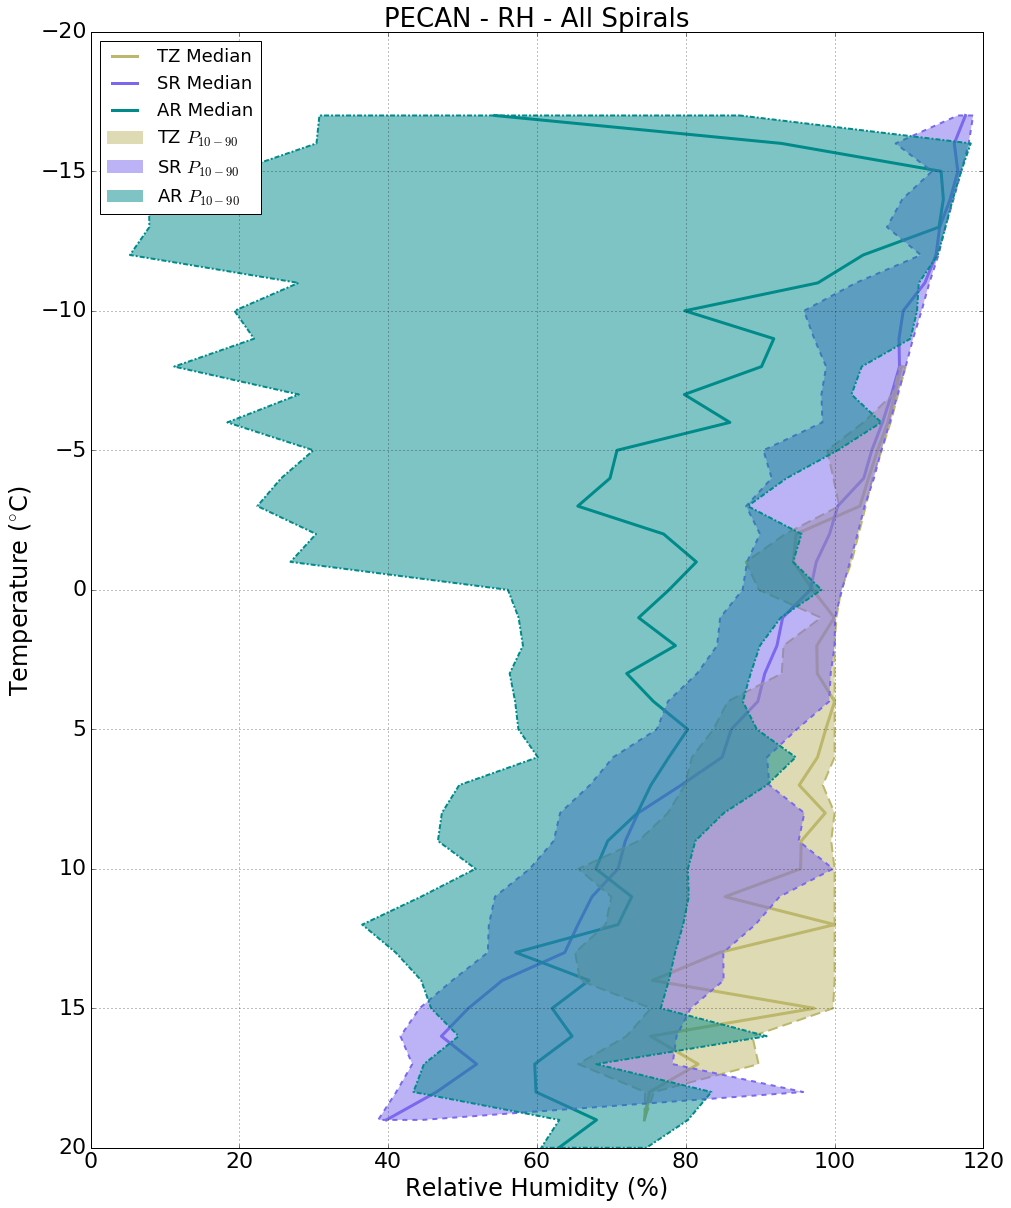

In [102]:
if plotRHall:
    fig, ax = plt.subplots(figsize=(16,20))
    ax.fill_betweenx(bin_mid,binRH_10pct_TZ,binRH_90pct_TZ,
                     alpha=0.5,facecolor=tzSprdCol,
                     edgecolor='none',linewidth=0,label='TZ $P_{10-90}$')
    ax.fill_betweenx(bin_mid,binRH_10pct_TZ,binRH_90pct_TZ,
                     facecolor='none',linestyle =(0.5,[10,5]),
                     edgecolor=tzSprdCol,linewidth=2)
    ax.plot(binRH_median_TZ,bin_mid,color=tzMcol,linewidth=3,label='TZ Median',zorder=0)
    
    
    ax.fill_betweenx(bin_mid,binRH_10pct_SR,binRH_90pct_SR,
                     alpha=0.5,facecolor=srSprdCol,
                     edgecolor='none',linewidth=0,label='SR $P_{10-90}$')
    ax.fill_betweenx(bin_mid,binRH_10pct_SR,binRH_90pct_SR,
                     facecolor='none',linestyle =(0.5,[5,5]),
                     edgecolor=srSprdCol,linewidth=2)
    ax.plot(binRH_median_SR,bin_mid,color=srMcol,linewidth=3,label='SR Median',zorder=0)
    
    
    ax.fill_betweenx(bin_mid,binRH_10pct_AR,binRH_90pct_AR,
                     alpha=0.5,facecolor=arSprdCol,
                     edgecolor='none',linewidth=0,label='AR $P_{10-90}$')
    ax.fill_betweenx(bin_mid,binRH_10pct_AR,binRH_90pct_AR,
                     facecolor='none',linestyle =(0.5,[2,2,5,2]),
                     edgecolor=arSprdCol,linewidth=2)
    ax.plot(binRH_median_AR,bin_mid,color=arMcol,linewidth=3,label='AR Median',zorder=0)
    
    ax.invert_yaxis()
    ax.legend(loc='best',fontsize=18)
    ax.set_xlabel('Relative Humidity (%)',fontsize=24)
    ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_title('PECAN - RH - All Spirals',fontsize=26)
    ax.grid()
    # Save the output figure
    saveStr = '{}all_spirals/RH-spread_ALL.{}'.format(figSavePath,fType)
    fig.savefig(saveStr,bbox_inches='tight')

In [7]:
# ax.set_xscale('log',nonposx='clip')